In [ ]:
import pandas as pd

pr_rq2 = pd.read_csv('/Users/young/Downloads/MDS/M3/542 data wrangling/data/pr_rq2.csv')

pr_meta = pd.read_parquet(
    '/Users/young/Downloads/MDS/M3/542 data wrangling/data/pull_request.parquet',
    columns=["id", "created_at", "closed_at", "merged_at", "state"]
)

pr_all = pr_rq2.merge(
    pr_meta,
    left_on="pr_id",
    right_on="id",
    how="inner"
)

for col in ["created_at", "closed_at", "merged_at"]:
    pr_all[col] = pd.to_datetime(pr_all[col])

pr_all["accepted"] = pr_all["merged_at"].notna().astype(int)

closed = pr_all[pr_all["closed_at"].notna()].copy()
closed["turnaround_hours"] = (
    closed["closed_at"] - closed["created_at"]
).dt.total_seconds() / 3600.0

rq3_summary = (
    closed
    .groupby("level")
    .agg(
        n_pr=("pr_id", "count"),
        accept_rate=("accepted", "mean"),
        median_turnaround_hours=("turnaround_hours", "median"),
        p25_turnaround_hours=("turnaround_hours", lambda x: x.quantile(0.25)),
        p75_turnaround_hours=("turnaround_hours", lambda x: x.quantile(0.75)),
    )
    .reset_index()
)

rq3_summary.to_csv("/Users/young/Downloads/MDS/M3/542 data wrangling/data/pr_rq3.csv", index=False)
print(rq3_summary)


   level   n_pr  accept_rate  median_turnaround_hours  p25_turnaround_hours  \
0    0.0   2736     0.296418                 1.410694              0.181389   
1    1.0   3136     0.575255                 9.684583              0.966250   
2    2.0  25412     0.842082                 0.046806              0.005000   

   p75_turnaround_hours  
0             52.869306  
1             93.122847  
2              1.804167  


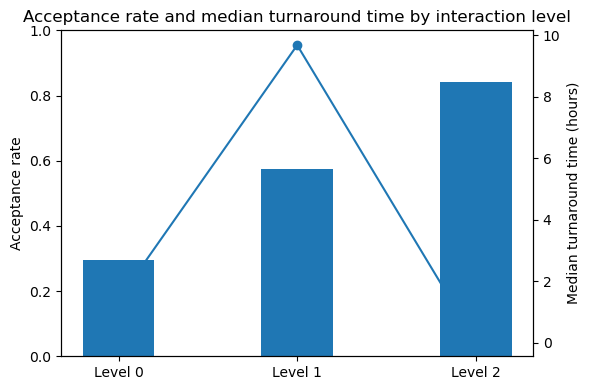

图已保存到： /Users/young/Downloads/MDS/M3/542 data wrangling/plots/rq3_accept_turnaround.png


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

save_dir = r"/Users/young/Downloads/MDS/M3/542 data wrangling/plots"
os.makedirs(save_dir, exist_ok=True)  

rq3 = pd.read_csv('/Users/young/Downloads/MDS/M3/542 data wrangling/data/pr_rq3.csv')
rq3 = rq3.sort_values("level")

x_labels = [f"Level {int(l)}" for l in rq3["level"]]
x = range(len(x_labels))

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(x, rq3["accept_rate"], width=0.4)
ax1.set_ylabel("Acceptance rate")
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels)
ax1.set_ylim(0, 1.0)

ax2 = ax1.twinx()
ax2.plot(x, rq3["median_turnaround_hours"], marker="o")
ax2.set_ylabel("Median turnaround time (hours)")

plt.title("Acceptance rate and median turnaround time by interaction level")
plt.tight_layout()

out_path = os.path.join(save_dir, "rq3_accept_turnaround.png")
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

print("图已保存到：", out_path)


/var/folders/k2/sngvkdcn2ydby0tvb60zn_p00000gn/T/ipykernel_39431/1188736302.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=[f"Level {lv}" for lv in levels_order])


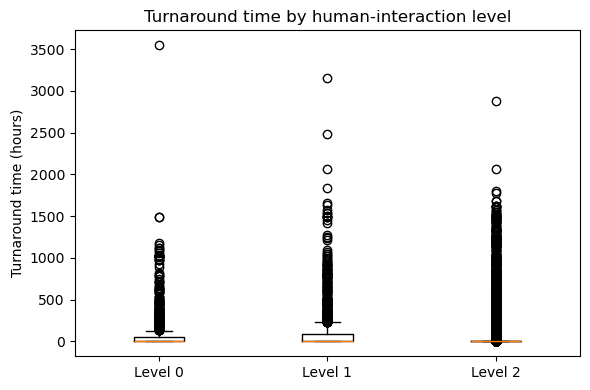

图已保存到： /Users/young/Downloads/MDS/M3/542 data wrangling/plots/rq3_turnaround_box.png


In [ ]:
import os
import matplotlib.pyplot as plt

save_dir = r"/Users/young/Downloads/MDS/M3/542 data wrangling/plots"
os.makedirs(save_dir, exist_ok=True)

closed_plot = closed.copy()
closed_plot["level_str"] = closed_plot["level"].astype(int).astype(str)

fig, ax = plt.subplots(figsize=(6, 4))

levels_order = ["0", "1", "2"]
data = [closed_plot.loc[closed_plot["level_str"] == lv, "turnaround_hours"]
        for lv in levels_order]

ax.boxplot(data, labels=[f"Level {lv}" for lv in levels_order])
ax.set_ylabel("Turnaround time (hours)")
ax.set_title("Turnaround time by human-interaction level")

plt.tight_layout()

out_path_box = os.path.join(save_dir, "rq3_turnaround_box.png")
plt.savefig(out_path_box, dpi=300, bbox_inches="tight")
plt.show()

print("save to：", out_path_box)
